In [1]:
import sys
# Python 3.7 is required
assert sys.version_info >= (3,7)

import cv2 as cv
import numpy as np

# For reproducibility,
np.random.seed(99)

# Make sure that optimization is enabled
if not cv.useOptimized():
    cv.setUseOptimized(True)

cv.useOptimized()

True

In [3]:
img = cv.imread('lena.jfif')
my_roi = img[:50, :50]
img[150:200, 150:200] = my_roi

cv.imshow('ROI_copy', img)
cv.waitKey(0)
cv.destroyAllWindows()

In [4]:
img = cv.imread('dog.jfif')
print(img.shape)

cv.imshow("original", img)
cropped_img = img[25:85, 100:200]
cv.imshow('cropped_img', cropped_img)

cv.waitKey(0)
cv.destroyAllWindows()

(168, 300, 3)


In [5]:
img = cv.imread('dog.jfif')
img_copy = img.copy()

height, width = img.shape[:2]
num_horizontal_patches = 2
num_vertical_patches = 3

# M and N are basically number of pixels per patch
M, N = int(height/num_horizontal_patches), int(width/num_vertical_patches)

x1, y1 = 0, 0

for y in range(0, height, M):
    for x in range(0, width, N):
        if (height - y) < M or (width - x) < N:
            break
            
        y1 = y + M    # lower right coordinate that will be used to construct rectangle
        x1 = x + N
        
        # Check whether patch lower right coordinate exceeds image height and width
        if x1 >= width and y1 >= height:
            x1 = width - 1
            y1 = height - 1
            tile = img[y:height, x:width]
            cv.rectangle(img_copy, (x, y), (x1, y1), (0, 255, 0), 1)
            cv.imshow('tile', tile)
        # When patch lower right y-coordinate exceeds patch height
        elif y1 >= height:
            y1 = height - 1
            cv.rectangle(img_copy, (x, y), (x1, y1), (0, 255, 0), 1)
            
        # When patch lower right x-coordinate exceeds patch width
        elif x1 >= width:
            x1 = width - 1
            cv.rectangle(img_copy, (x, y), (x1, y1), (0, 255, 0), 1)
        
        else:
            cv.rectangle(img_copy, (x, y), (x1, y1), (0, 255, 0), 1)

cv.imshow('patched image', img_copy)
cv.waitKey(0)
cv.destroyAllWindows()

### Exercise

In [7]:
#swapped region
image = cv.imread('dog.jfif')
height, width = image.shape[:2]

#create a new array with the same dimension as the original image
new_image = np.zeros(image.shape, dtype=np.uint8)

#half of dimensions
height_half = int(height/2)
#height_half = height//2
width_half = int(width/2)

#put 1--4
new_image[height_half:, width_half:] = img[:height_half, :width_half]

new_image[:height_half, :width_half] = img[height_half:, width_half:]

new_image[height_half:, :width_half] = img[:height_half, width_half:]

new_image[:height_half, width_half:] = img[height_half:, :width_half]

cv.imshow('dog', new_image)
cv.waitKey(0)
cv.destroyAllWindows()

In [9]:
#cover the face of lena
img = cv.imread('lena.jfif')

#row: 85-170, column: 90-160
roi = img[85:170, 90:160]

cv.imshow('roi',roi)
cv.waitKey(0)
cv.destroyAllWindows()

#white region, (255,255, 255)

In [10]:
white_mask = np.ones(roi.shape)*255
white_mask = np.uint8(white_mask)
img_copy = img.copy()

img_copy[85:170, 90:160] = white_mask

cv.imshow('roi',img_copy)
cv.waitKey(0)
cv.destroyAllWindows()

# Splitting and merging color channels

In [14]:
b, g, r = cv.split(img)
img = cv.merge((b,g,r))

cv.imshow('lena', img)
cv.waitKey(0)
cv.destroyAllWindows()

In [15]:
r = img[:,:,2]

# show multiple channels simultaneously

In [16]:
import matplotlib.pyplot as plt

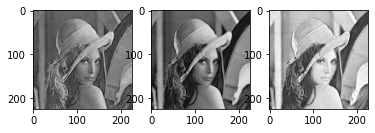

In [19]:
#show the image interms of its color channels
plt.subplot(1, 3, 1)
plt.imshow(b, cmap = 'gray')
plt.subplot(1, 3, 2)
plt.imshow(g, cmap = 'gray')
plt.subplot(1, 3, 3)
plt.imshow(r, cmap = 'gray')

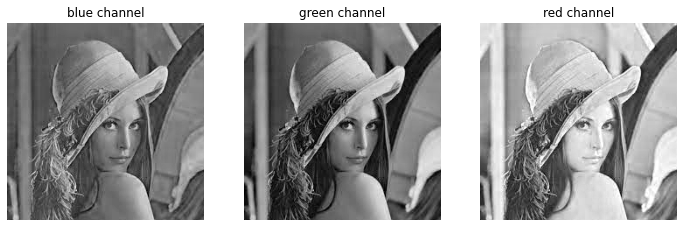

In [21]:
#improvements (control the figure size ,remove the axes tick labels, add titles to subplot)
fig = plt.figure(figsize = (12,8))
ax = fig.add_subplot(1, 3, 1)
plt.imshow(b, cmap='gray'), plt.axis('off')
ax.set_title('blue channel')

ax = fig.add_subplot(1, 3, 2)
plt.imshow(g, cmap='gray'), plt.axis('off')
ax.set_title('green channel')

ax = fig.add_subplot(1, 3, 3)
plt.imshow(r, cmap='gray'), plt.axis('off')
ax.set_title('red channel')

plt.show()

In [22]:
img1 = cv.imread('lena.jpg')
img2 = cv.imread('coins.jfif')

# Resize img2
new_shape = img1.shape[:2]
img2 = cv.resize(img2, new_shape)

dst = cv.addWeighted(img1, 0.75, img2, 0.25, 0)

cv.imshow('image1', img1)
cv.imshow('reshape_image2', img2)
cv.imshow('blend_image', dst)
cv.waitKey(0)
cv.destroyAllWindows()

AttributeError: 'NoneType' object has no attribute 'shape'

In [23]:
img = cv.imread('lena.jfif')
height, width = img.shape[:-1]

#2x3 matrix
M = np.float32([[1,0,100], [0,1,50]])
dst = cv.warpAffine(img, M, (width, height))

# Exercise

In [27]:
#Bulleye image
img = np.zeros((300, 300), dtype='uint8')

center = (img.shape[1]//2, img.shape[0]//2)
radius = list(range(15, 150, 10))

for r in radius:
    cv.circle(img, center, r, 255, 1, cv.LINE_AA)
    
# text
text = 'Bulleye'
cv.putText(img, text, (10, 280), 0, 0.6, 255)

cv.imshow('Bulleye', img)
cv.waitKey(0)
cv.destroyAllWindows()

# Bitwise operation

In [3]:
#draw a rectangle on a dark background
rect = np.zeros((400, 400), dtype='uint8')
cv.rectangle(rect, (30,30), (370,370), 255, -1)
cv.imshow('rectangle', rect)
#draw a circle in a dark background
circle = np.zeros((400, 400), dtype='uint8')
cv.circle(circle, (200,200), 200, 255, -1)
cv.imshow('circle', circle)

cv.waitKey(0)
cv.destroyAllWindows()

In [29]:
#and operation
res = cv.bitwise_and(rect, circle)

cv.imshow('AND', res)
cv.waitKey(0)
cv.destroyAllWindows()

In [ ]:
#inverse